<a href="https://colab.research.google.com/github/shhuangmust/AI/blob/110-2/14.n_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-Grams
- 了解單一字詞表示方式，接下來則是語言模型的表示。語言模型是由"字詞/字句"所構成，所以要透過組合單一字詞成為其他有意義的"字詞/字句"
- 組合的過程稱之為n-grams，單一字詞為1-gram，兩個字詞組成有意義的"字詞/字句"稱之為2-grams，依此類推
- 本範例利用情緒分析範例，示範如何把評論詞切成n-grams的前處理過程
- 前處理過程包含：1. 去除標點符號(punctuation) 2. 去除停用詞(stopwords，無意義之詞，例如"的"、"了"...之類)
- 接下來產生單字詞unigram，雙字詞bigram，三字詞trigram


**SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR**

**->3 categories:**


-positive

-negative

-neutral

DATASET:

https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news



In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [30]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1", header=None, names = ['Sentiment', 'News Headline'])
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [32]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [33]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**Feature extraction**

In [34]:
y=df['Sentiment'].values
y.shape

(4846,)

In [35]:
x=df['News Headline'].values
x.shape

(4846,)

**Train-test split**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [38]:
x_train.shape

(2907,)

In [39]:
y_train.shape

(2907,)

In [40]:
x_test.shape

(1939,)

In [41]:
y_test.shape

(1939,)

In [42]:
x_train

array(['The lay-offs will start gradually and will last from one to six weeks .',
       'ADPnews - Feb 5 , 2010 - Finnish real estate investor Sponda Oyj HEL : SDA1V said today that it slipped to a net loss of EUR 81.5 million USD 11.8 m in 2009 from a profit of EUR 29.3 million in 2008 .',
       'No financial details were revealed .', ...,
       "18 January 2010 - Finnish IT consultancy Trainers ' House Oyj HEL : TRH1V said last Friday it resolved to issue a EUR5m hybrid bond to domestic investors in a bid to strengthen its capital structure .",
       'M-real Corporation Stock Exchange Announcement 29 September 2006 at 4.15 p.m. Kyro Corporation and M-real Corporation , a Metsaliitto Group subsidiary , have agreed on an arrangement which gives M-real option to purchase the Kyroskoski natural gas powerplant from Kyro .',
       'Its total annual revenue comes up to about 160 mln zloty ( $ 56.9 mln-42 .3 mln euro ) .'],
      dtype=object)

In [43]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,The lay-offs will start gradually and will las...,neutral
1,"ADPnews - Feb 5 , 2010 - Finnish real estate i...",negative
2,No financial details were revealed .,neutral
3,The contract covers turnkey deliveries to all ...,neutral
4,"ALEXANDRIA , Va. , May 23 -- Matti Harkonen an...",neutral


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [45]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,The company is in charge of all natural gas st...,neutral
1,Operating profit for the 12-month period decre...,negative
2,Cramo Group 's financial targets for 2010-2013...,neutral
3,"Sales came in at 241 mln eur , compared with 2...",neutral
4,Filmiteollisuus Fine Ab will be transferred to...,neutral


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


**Pre-processing**

In [47]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [49]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,The layoffs will start gradually and will last...,neutral
1,ADPnews Feb 5 2010 Finnish real estate inve...,negative
2,No financial details were revealed,neutral
3,The contract covers turnkey deliveries to all ...,neutral
4,ALEXANDRIA Va May 23 Matti Harkonen and Pen...,neutral


In [50]:
import nltk
from nltk.corpus import stopwords

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
    


In [53]:
#sample!
generate_N_grams("The sun rises in the east",3)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun rises', 'sun rises east']

**Create unigrams**

In [54]:
from collections import defaultdict

In [55]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['The', 'concept', 'enables', 'commercially', 'affordable', 'way', 'manufacture', 'highquality', 'TCO', 'coated', 'glass', 'solar', 'industry', '']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', '', 'compared', '2007', '']
Sentence after removing stopwords: ['By', 'cutting', 'number', 'plants', '', 'group', 'trim', 'fixed', 'costs', '']
Sentence after removing stopwords: ['More', 'staff', 'recruited', 'Japan', 'complement', 'network', 'close', '50', 'service', 'locations', '20', 'countries', 'worldwide', '']
Sentence after removing stopwords: ['Finnish', 'Swedish', 'construction', 'markets', 'still', 'experiencing', 'estimated', '4', '', 'annual', 'growth', '2008', '']
Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', '', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year', '']
S

In [57]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'The': 165,
             'concept': 2,
             'enables': 5,
             'commercially': 3,
             'affordable': 1,
             'way': 4,
             'manufacture': 1,
             'highquality': 2,
             'TCO': 1,
             'coated': 1,
             'glass': 3,
             'solar': 4,
             'industry': 14,
             '': 2374,
             'Talentum': 3,
             'expects': 15,
             'net': 111,
             'sales': 105,
             'core': 5,
             'business': 37,
             'increase': 44,
             '2008': 53,
             'compared': 40,
             '2007': 47,
             'By': 3,
             'cutting': 2,
             'number': 7,
             'plants': 4,
             'group': 38,
             'trim': 1,
             'fixed': 2,
             'costs': 9,
             'More': 2,
             'staff': 2,
             'recruited': 1,
             'Japan': 4,
             'complement': 1,
   

In [58]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('The', 165), ('concept', 2), ('enables', 5), ('commercially', 3), ('affordable', 1), ('way', 4), ('manufacture', 1), ('highquality', 2), ('TCO', 1), ('coated', 1), ('glass', 3), ('solar', 4), ('industry', 14), ('', 2374), ('Talentum', 3), ('expects', 15), ('net', 111), ('sales', 105), ('core', 5), ('business', 37), ('increase', 44), ('2008', 53), ('compared', 40), ('2007', 47), ('By', 3), ('cutting', 2), ('number', 7), ('plants', 4), ('group', 38), ('trim', 1), ('fixed', 2), ('costs', 9), ('More', 2), ('staff', 2), ('recruited', 1), ('Japan', 4), ('complement', 1), ('network', 9), ('close', 4), ('50', 7), ('service', 26), ('locations', 5), ('20', 18), ('countries', 12), ('worldwide', 1), ('Finnish', 124), ('Swedish', 9), ('construction', 17), ('markets', 11), ('still', 5), ('experiencing', 1), ('estimated', 13), ('4', 18), ('annual', 11), ('growth', 24), ('In', 39), ('addition', 7), ('fireplace', 1), ('exports', 1), ('demand', 9), ('lining', 1), ('stone', 1), ('exceeded', 

In [59]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

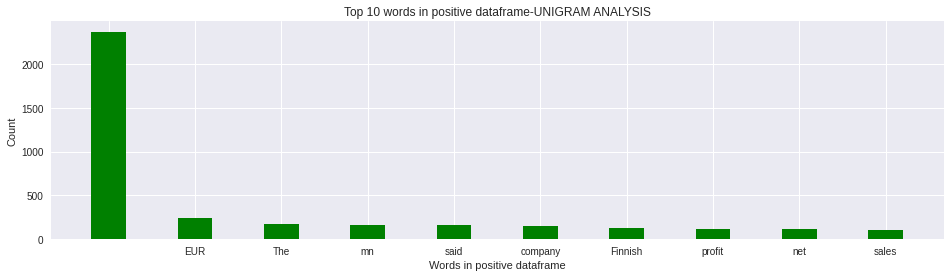

In [60]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [61]:
df_positive.head(10)

,0,1
0,,2374
1,EUR,244
2,The,165
3,mn,154
4,said,154
5,company,144
6,Finnish,124
7,profit,117
8,net,111
9,sales,105


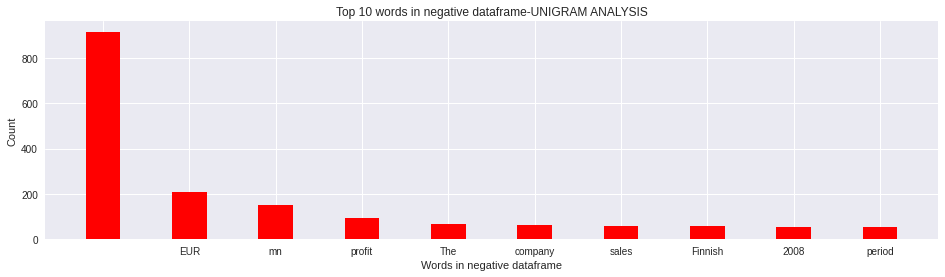

In [62]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [63]:
df_negative.head(10)

,0,1
0,,918
1,EUR,206
2,mn,150
3,profit,90
4,The,66
5,company,59
6,sales,58
7,Finnish,57
8,2008,53
9,period,52


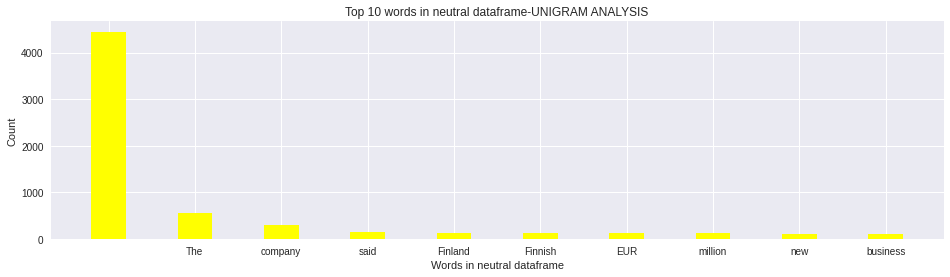

In [64]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [65]:
df_neutral.head(10)

,0,1
0,,4449
1,The,559
2,company,294
3,said,142
4,Finland,132
5,Finnish,132
6,EUR,118
7,million,118
8,new,100
9,business,100


**Creating bigrams**

In [66]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [67]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['The', 'concept', 'enables', 'commercially', 'affordable', 'way', 'manufacture', 'highquality', 'TCO', 'coated', 'glass', 'solar', 'industry', '']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', '', 'compared', '2007', '']
Sentence after removing stopwords: ['By', 'cutting', 'number', 'plants', '', 'group', 'trim', 'fixed', 'costs', '']
Sentence after removing stopwords: ['More', 'staff', 'recruited', 'Japan', 'complement', 'network', 'close', '50', 'service', 'locations', '20', 'countries', 'worldwide', '']
Sentence after removing stopwords: ['Finnish', 'Swedish', 'construction', 'markets', 'still', 'experiencing', 'estimated', '4', '', 'annual', 'growth', '2008', '']
Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', '', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year', '']
S

In [68]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

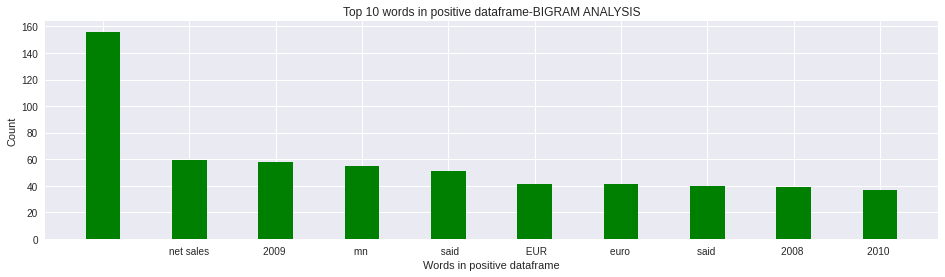

In [69]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [70]:
df_positive2.head(10)

,0,1
0,,156
1,net sales,59
2,2009,58
3,mn,55
4,said,51
5,EUR,41
6,euro,41
7,said,40
8,2008,39
9,2010,37


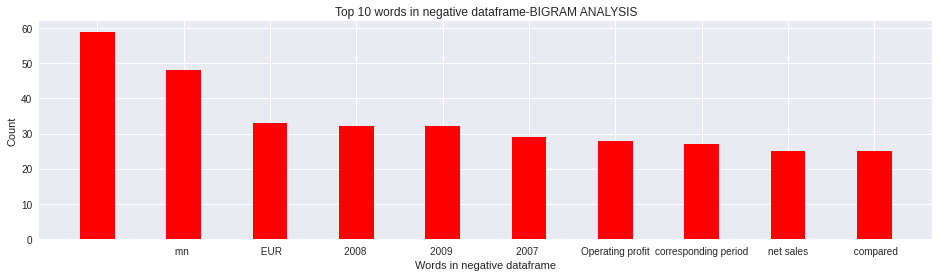

In [71]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [72]:
df_negative2.head(10)

,0,1
0,,59
1,mn,48
2,EUR,33
3,2008,32
4,2009,32
5,2007,29
6,Operating profit,28
7,corresponding period,27
8,net sales,25
9,compared,25


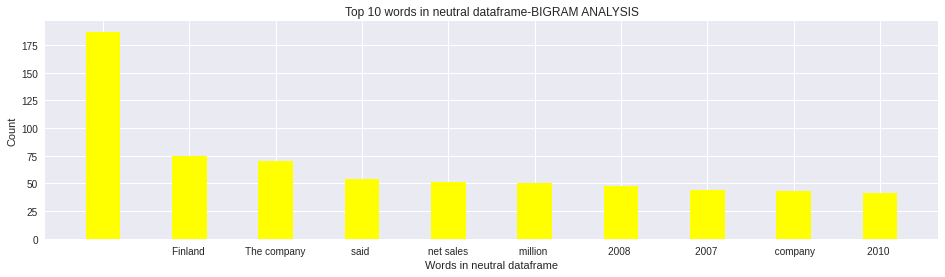

In [73]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [74]:
df_neutral2.head(10)

,0,1
0,,187
1,Finland,75
2,The company,70
3,said,54
4,net sales,51
5,million,50
6,2008,48
7,2007,44
8,company,43
9,2010,41


**Creating trigrams**

In [75]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [76]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['The', 'concept', 'enables', 'commercially', 'affordable', 'way', 'manufacture', 'highquality', 'TCO', 'coated', 'glass', 'solar', 'industry', '']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', '', 'compared', '2007', '']
Sentence after removing stopwords: ['By', 'cutting', 'number', 'plants', '', 'group', 'trim', 'fixed', 'costs', '']
Sentence after removing stopwords: ['More', 'staff', 'recruited', 'Japan', 'complement', 'network', 'close', '50', 'service', 'locations', '20', 'countries', 'worldwide', '']
Sentence after removing stopwords: ['Finnish', 'Swedish', 'construction', 'markets', 'still', 'experiencing', 'estimated', '4', '', 'annual', 'growth', '2008', '']
Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', '', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year', '']
S

In [77]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

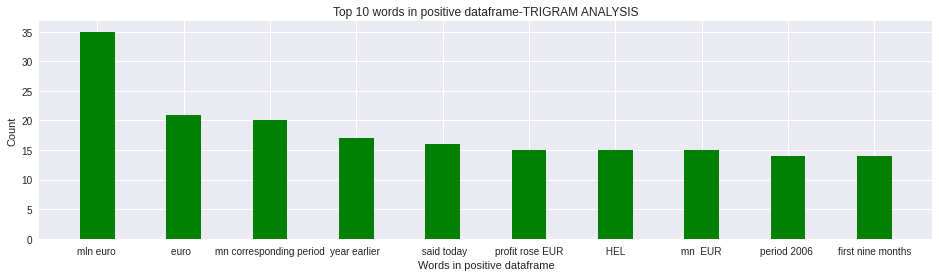

In [78]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [79]:
df_positive3.head(10)

,0,1
0,mln euro,35
1,euro,21
2,mn corresponding period,20
3,year earlier,17
4,said today,16
5,profit rose EUR,15
6,HEL,15
7,mn EUR,15
8,period 2006,14
9,first nine months,14


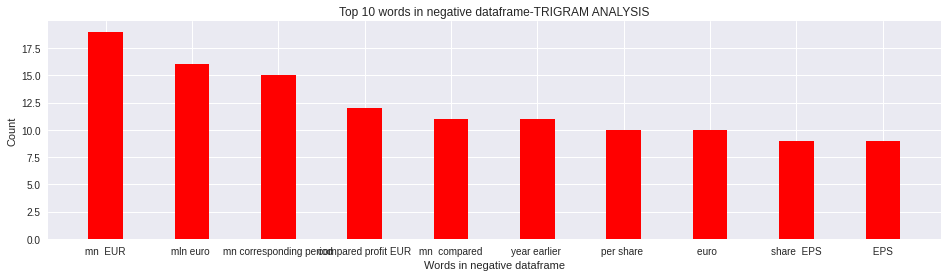

In [80]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [81]:
df_negative3.head(10)

,0,1
0,mn EUR,19
1,mln euro,16
2,mn corresponding period,15
3,compared profit EUR,12
4,mn compared,11
5,year earlier,11
6,per share,10
7,euro,10
8,share EPS,9
9,EPS,9


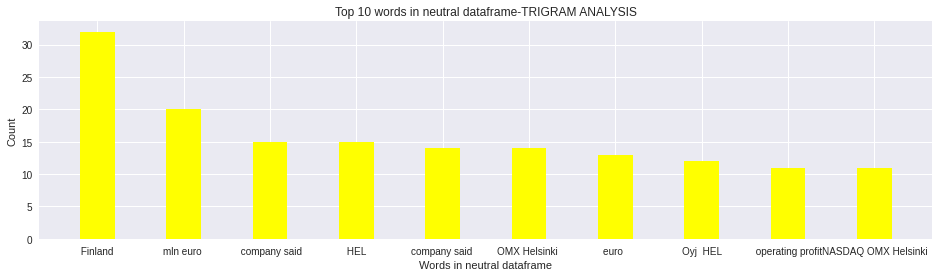

In [82]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [83]:
df_neutral3.head(10)

,0,1
0,Finland,32
1,mln euro,20
2,company said,15
3,HEL,15
4,company said,14
5,OMX Helsinki,14
6,euro,13
7,Oyj HEL,12
8,operating profit,11
9,NASDAQ OMX Helsinki,11


**Using CountVectorizer()**

-can also b used to check the most common bigrams